# neural network model with pytorch

##### dataset : Fashion-MNIST dataset
##### Fashion-MNIST : 28x28 흑백으로 된 의류 image

#### dataset 준비

In [1]:
import torch
from torchvision import datasets, transforms
import helper

In [2]:
transform = transforms.Compose([transforms.Grayscale(),
    transforms.ToTensor()])
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=2000, shuffle=True)

In [4]:
images, labels = next(iter(trainloader))

In [5]:
images.shape

torch.Size([2000, 1, 28, 28])

In [6]:
images[0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0039, 0.0078, 0.0039, 0.0000, 0.0078, 0.0000,
          0.0824, 0.4667, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000,
          0.0000, 0.0118, 0.0000, 0.0000, 0.0000, 0.0000,

In [7]:
torch.mean(images)

tensor(0.2839)

In [8]:
torch.std(images)

tensor(0.3509)

In [9]:
device = 'cpu'
if torch.cuda.is_available():
    device = 'cuda'

In [10]:
torch.cuda.is_available()

True

In [11]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.28,), (0.35,))])

# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
valset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

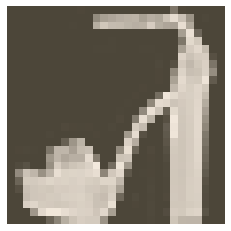

In [12]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

In [13]:
from torch import nn, optim
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(784, 256) # linear layer 1
        self.fc2 = nn.Linear(256, 128) # linear layer 2
        self.fc3 = nn.Linear(128, 64) # linear layer 3
        self.fc4 = nn.Linear(64, 10) # linear layer 4, 최종 output layer의 output은 10 (분류를 10개로 하므로)

    def forward(self, x):
       
        x = F.relu(self.fc1(x)) # activation function : relu
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x) # 최종 layer는 linear layer만 연산
        
        return x

### Training the network

In [14]:
# TODO: 네트워크를 training (epoch는 5번)
model = Classifier()
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 5

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.reshape(images.shape[0],-1).to(device)
        labels = labels.to(device)
        
        logits = model(images)
        loss = criterion(logits, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
       
        running_loss += loss.item()
    
    print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.4861023728368379
Training loss: 0.3668515327960443
Training loss: 0.3310988182539561
Training loss: 0.31287433472332926
Training loss: 0.29782147400541853


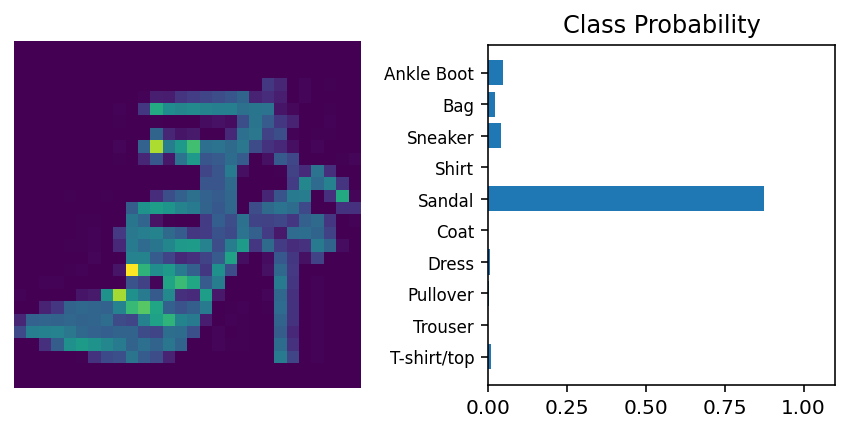

In [15]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Test out your network!

images, labels = next(iter(valloader))
img = images[1].reshape(1,-1)
img = img.to(device)

# log softmax 값을 softmax로 변환하여 확률값을 저장
logits = model(img)
sm = nn.Softmax(dim=1)
ps = sm(logits)

# Plot the image and probabilities
helper.view_classify(img.to('cpu'), ps.cpu(), version='Fashion')

# Inference and Validation
##### - inference : training된 network를 활용하여 예측하는 것
##### - generation : training된 network를 새로운 data에 대해서도 좋은 성능을 갖게하는 것 
##### - overfitting : NN은 training된 데이터에 너무 최적화되어, 새로운 데이터에 대해서 성능이 떨어지는 문제 발생 
##### - generation이 잘되어서 overfitting이 안일어났는지 확인하는 작업을 validation set으로 data를 분리하여 수행 
##### - overfitting이 일어나지 않도록 처리하는 기법을 regularization이라고 하며 대표적으로 dropout이 있음 

```python
valset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
```

In [16]:
model = Classifier()

images, labels = next(iter(valloader))

# Get the class probabilities
images = images.reshape(images.shape[0],-1)
logits = model(images)
ps = sm(logits)
# Make sure the shape is appropriate, we should get 10 class probabilities for 64 examples
print(ps.shape)

torch.Size([64, 10])


* 출력은 각 classification 항목에 대한 확률 분포로 출력됩니다
* `ps.topk` method로 $k$개의 활률 값이 가장 높은 value와 index를 tuple로 받습니다
* 가장 높은 가능성으로 분류를 하고자하니, `ps.topk(1)`를 사용합니다
* 예를 들어서 가장 높은 value가 5번째이면 index 4를 받습니다

In [17]:
top_p, top_class = ps.topk(1, dim=1)
# Look at the most likely classes for the first 10 examples
print(top_class[:10,:])
print(top_p[:10,:])
top_class.shape

tensor([[3],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3]])
tensor([[0.1149],
        [0.1119],
        [0.1146],
        [0.1161],
        [0.1130],
        [0.1152],
        [0.1148],
        [0.1147],
        [0.1121],
        [0.1177]], grad_fn=<SliceBackward0>)


torch.Size([64, 1])

In [18]:
ps[:10,:]

tensor([[0.0946, 0.0925, 0.1108, 0.1149, 0.0872, 0.0977, 0.1061, 0.0911, 0.1093,
         0.0958],
        [0.0983, 0.0967, 0.1096, 0.1119, 0.0880, 0.0987, 0.1006, 0.0895, 0.1048,
         0.1019],
        [0.0929, 0.0943, 0.1091, 0.1146, 0.0871, 0.1007, 0.1030, 0.0897, 0.1038,
         0.1050],
        [0.0959, 0.0911, 0.1091, 0.1161, 0.0869, 0.1008, 0.0990, 0.0920, 0.1060,
         0.1031],
        [0.0973, 0.0945, 0.1102, 0.1130, 0.0917, 0.0950, 0.1048, 0.0912, 0.1049,
         0.0974],
        [0.0968, 0.0953, 0.1091, 0.1152, 0.0884, 0.0981, 0.0980, 0.0933, 0.1043,
         0.1015],
        [0.0966, 0.1004, 0.1127, 0.1148, 0.0851, 0.0934, 0.1040, 0.0898, 0.1038,
         0.0995],
        [0.0985, 0.0968, 0.1110, 0.1147, 0.0874, 0.0974, 0.1006, 0.0904, 0.1054,
         0.0977],
        [0.0997, 0.0958, 0.1100, 0.1121, 0.0885, 0.0939, 0.1036, 0.0918, 0.1024,
         0.1023],
        [0.0936, 0.0928, 0.1125, 0.1177, 0.0862, 0.0981, 0.0970, 0.0939, 0.1037,
         0.1046]], grad_fn=<

In [19]:
labels.shape

torch.Size([64])

In [20]:
top_class.shape

torch.Size([64, 1])

In [21]:
top_class == labels.reshape(top_class.shape)

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [ True],
        [ True],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False

In [22]:
labels

tensor([8, 8, 7, 7, 9, 5, 8, 2, 3, 7, 7, 5, 1, 8, 5, 1, 4, 7, 6, 8, 1, 3, 5, 1,
        8, 3, 7, 0, 3, 3, 7, 3, 4, 1, 2, 2, 2, 9, 5, 4, 6, 1, 6, 0, 2, 6, 2, 6,
        3, 3, 3, 1, 9, 1, 9, 8, 5, 3, 7, 4, 3, 2, 3, 4])

In [23]:
equals = top_class == labels.reshape(top_class.shape)
top_class.shape

torch.Size([64, 1])

In [24]:
accuracy = torch.mean(equals.type(torch.float))
print(f'Accuracy: {accuracy*100}%')

Accuracy: 15.625%


In [25]:
model = Classifier()
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30
steps = 0

train_losses, val_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.reshape(images.shape[0],-1).to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        
        logits = model(images)
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    
    val_loss = 0
    accuracy = 0


    with torch.no_grad():
        for images, labels in valloader:
            images = images.reshape(images.shape[0], -1).to(device)
            labels = labels.to(device)
            logits = model(images)
            val_loss += criterion(logits, labels).item()
            
            ps = sm(logits)
            top_p, top_class = ps.topk(1, dim=1)
            equals = top_class == labels.reshape(top_class.shape)
            accuracy += torch.mean(equals.type(torch.float))

    train_losses.append(running_loss/len(trainloader))
    val_losses.append(val_loss/len(valloader))

    print("Epoch: {}/{}.. ".format(e+1, epochs),
          "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
          "Validation Loss: {:.3f}.. ".format(val_loss/len(valloader)),
          "Validation Accuracy: {:.3f}".format(accuracy/len(valloader)))

Epoch: 1/30..  Training Loss: 0.485..  Validation Loss: 0.470..  Validation Accuracy: 0.825
Epoch: 2/30..  Training Loss: 0.371..  Validation Loss: 0.403..  Validation Accuracy: 0.856
Epoch: 3/30..  Training Loss: 0.337..  Validation Loss: 0.392..  Validation Accuracy: 0.861
Epoch: 4/30..  Training Loss: 0.317..  Validation Loss: 0.360..  Validation Accuracy: 0.875
Epoch: 5/30..  Training Loss: 0.297..  Validation Loss: 0.359..  Validation Accuracy: 0.876
Epoch: 6/30..  Training Loss: 0.284..  Validation Loss: 0.395..  Validation Accuracy: 0.865
Epoch: 7/30..  Training Loss: 0.275..  Validation Loss: 0.360..  Validation Accuracy: 0.880
Epoch: 8/30..  Training Loss: 0.268..  Validation Loss: 0.360..  Validation Accuracy: 0.879
Epoch: 9/30..  Training Loss: 0.260..  Validation Loss: 0.382..  Validation Accuracy: 0.880
Epoch: 10/30..  Training Loss: 0.251..  Validation Loss: 0.365..  Validation Accuracy: 0.878
Epoch: 11/30..  Training Loss: 0.246..  Validation Loss: 0.386..  Validation Ac

In [26]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

Text(0, 0.5, 'loss')

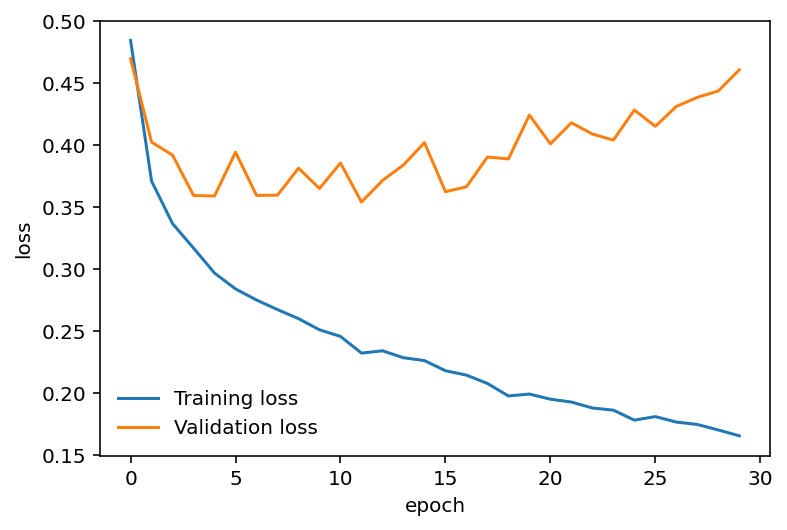

In [27]:
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend(frameon=False)
plt.xlabel('epoch')
plt.ylabel('loss')

In [28]:
class Classifier(nn.Module):
   
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        self.relu = nn.ReLU(True)
        
        self.dropout = nn.Dropout(p = 0.2)
        
    def forward(self, x):
       # Now with dropout
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.dropout(self.relu(self.fc2(x)))
        x = self.dropout(self.relu(self.fc3(x)))
        x = self.fc4(x)

        return x

In [29]:
    model = Classifier()
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.003)

    epochs = 30
    steps = 0

    train_losses, val_losses = [], []
    for e in range(epochs):
        running_loss = 0


        for images, labels in trainloader:
            images = images.reshape(images.shape[0],-1).to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
        
            logits = model(images)
            loss = criterion(logits, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()


        val_loss = 0
        accuracy = 0

        with torch.no_grad():
            model.eval()
            for images, labels in valloader:
                images = images.reshape(images.shape[0], -1).to(device)
                labels = labels.to(device)
                
                logits = model(images)
                val_loss += criterion(logits, labels).item()
            
                ps = sm(logits)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.reshape(top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))

        model.train()
        train_losses.append(running_loss/len(trainloader))
        val_losses.append(val_loss/len(valloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(train_losses[-1]),
              "Validation Loss: {:.3f}.. ".format(val_losses[-1]),
              "Validation Accuracy: {:.3f}".format(accuracy/len(valloader)))

Epoch: 1/30..  Training Loss: 0.572..  Validation Loss: 0.451..  Validation Accuracy: 0.833
Epoch: 2/30..  Training Loss: 0.450..  Validation Loss: 0.435..  Validation Accuracy: 0.844
Epoch: 3/30..  Training Loss: 0.423..  Validation Loss: 0.416..  Validation Accuracy: 0.846
Epoch: 4/30..  Training Loss: 0.405..  Validation Loss: 0.392..  Validation Accuracy: 0.860
Epoch: 5/30..  Training Loss: 0.392..  Validation Loss: 0.401..  Validation Accuracy: 0.860
Epoch: 6/30..  Training Loss: 0.387..  Validation Loss: 0.389..  Validation Accuracy: 0.862
Epoch: 7/30..  Training Loss: 0.382..  Validation Loss: 0.382..  Validation Accuracy: 0.868
Epoch: 8/30..  Training Loss: 0.373..  Validation Loss: 0.376..  Validation Accuracy: 0.871
Epoch: 9/30..  Training Loss: 0.367..  Validation Loss: 0.376..  Validation Accuracy: 0.871
Epoch: 10/30..  Training Loss: 0.366..  Validation Loss: 0.367..  Validation Accuracy: 0.868
Epoch: 11/30..  Training Loss: 0.360..  Validation Loss: 0.373..  Validation Ac

In [30]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

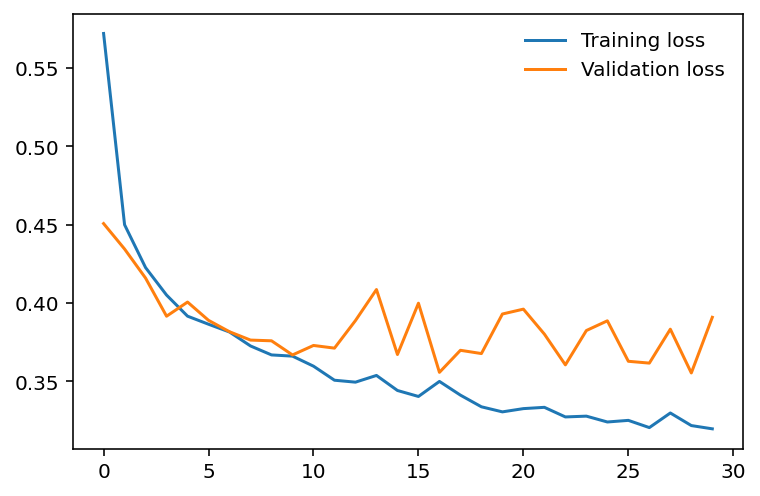

In [31]:
plt.plot(train_losses[:30], label='Training loss')
plt.plot(val_losses[:30], label='Validation loss')
plt.legend(frameon=False)

# model save and load

In [32]:
print("Our model: \n\n", model, '\n')
print("The state dict keys: \n\n", model.state_dict().keys())

Our model: 

 Classifier(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU(inplace=True)
  (dropout): Dropout(p=0.2, inplace=False)
) 

The state dict keys: 

 odict_keys(['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias', 'fc4.weight', 'fc4.bias'])


In [33]:
print("Our optimizer: \n\n", optimizer, '\n')
print("The state dict keys: \n\n", optimizer.state_dict().keys())

Our optimizer: 

 Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.003
    weight_decay: 0
) 

The state dict keys: 

 dict_keys(['state', 'param_groups'])


In [34]:
torch.save(model.state_dict(), 'thecloset_model_statedict.pth')

In [35]:
state_dict = torch.load('thecloset_model_statedict.pth')
print(state_dict.keys())

odict_keys(['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias', 'fc4.weight', 'fc4.bias'])


In [36]:
model.load_state_dict(state_dict)

<All keys matched successfully>

In [37]:
torch.save(optimizer.state_dict(), 'thecloset_opt_statedict.pth')

In [38]:
opt_state_dict = torch.load('thecloset_opt_statedict.pth')

In [39]:
optimizer.load_state_dict(opt_state_dict)

In [40]:
torch.save(model, 'thecloset_model_save.pt')

In [41]:
model_load = torch.load('thecloset_model_save.pt')

###### Inference : 실제 적용하는 예 

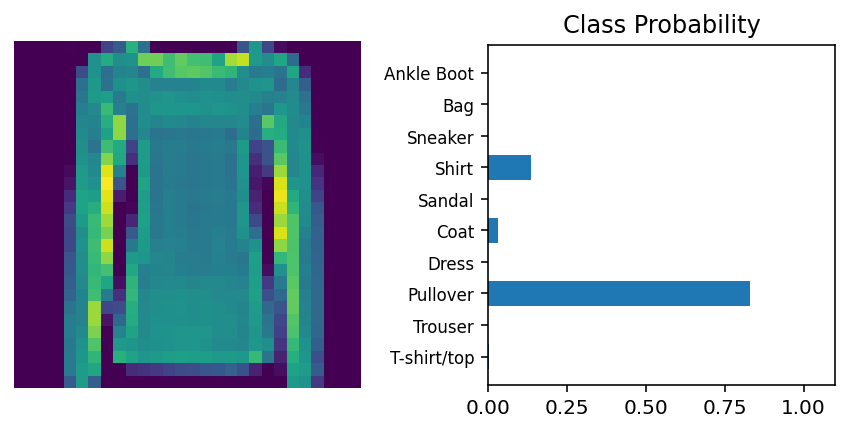

In [42]:
# Import helper module (should be in the repo)
import helper

# Test out your network!

model.eval()

dataiter = iter(valloader)
images, labels = dataiter.next()
images = images.reshape(images.shape[0],-1).to(device)
labels = labels.to(device)
img = images[0]
# Convert 2D image to 1D vector
img = img.view(1, 784)

# Calculate the class probabilities (softmax) for img
with torch.no_grad():
    output = model.forward(img)

ps = sm(output)

# Plot the image and probabilities
img = img.cpu()
ps = ps.cpu()
helper.view_classify(img.view(1, 28, 28), ps, version='Fashion')

In [43]:
from torch.utils.data import Dataset

```python
class test_Dataset(Dataset): #test_set을 class로 정의합니다.
    def __init__(self,imgpath,transform=None):
        
        self.imgpath = imgpath
        self.transform = transform
        
    def __len__(self):
        return len(self.imgpath)
    
    def __getitem__(self,idx):
        x = self.transform(Image.open(self.imgpath[idx]).convert('RGB'))
        
        return x

# torch.cuda.empty_cache()
```

In [82]:
from PIL import Image

In [134]:
a = Image.open('test_data/4.jpg').convert('RGB')

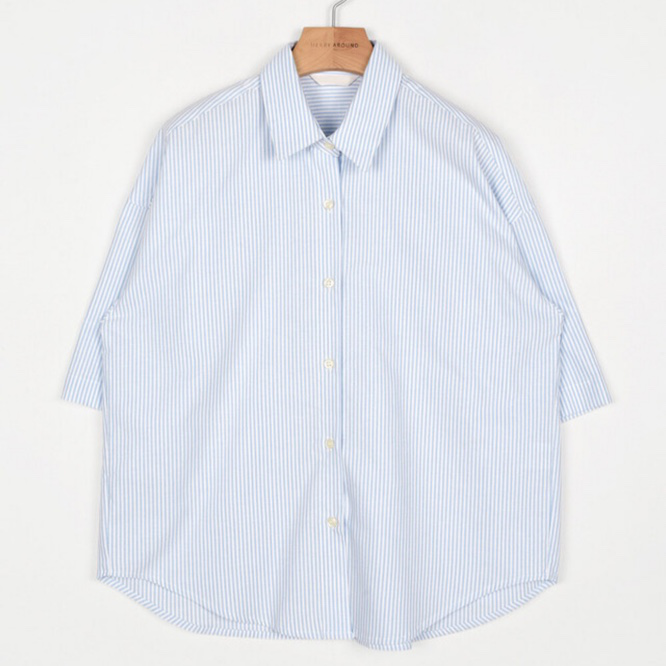

In [135]:
a

In [120]:
from torchvision import transforms

In [137]:
# 데이터 전처리 
transform = transforms.Compose([transforms.Resize((28,28)),
    transforms.Grayscale(),
    transforms.ToTensor()])

In [138]:
data =  transform(a)


In [139]:
transforms.ToPILImage()(data) # ToPILImage : PIL 이미지, Numpy 배열 -> pytorch image tensor


In [140]:
data.shape

torch.Size([1, 28, 28])

In [141]:
data = data.reshape(-1)

In [142]:
data.shape

torch.Size([784])

In [143]:
class Classifier(nn.Module):
    
#    # 앞 문제에서 작성한 network에 dropout 적용
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        self.relu = nn.ReLU(True)
        
        self.dropout = nn.Dropout(p = 0.2)
        
    def forward(self, x):
       # Now with dropout
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.dropout(self.relu(self.fc2(x)))
        x = self.dropout(self.relu(self.fc3(x)))
        x = self.fc4(x)
        return x
    ##############################
model = Classifier()

In [144]:
model.eval()
logits = model(data) # logits : 마지막 layers의 결과 

In [145]:
ps = F.softmax(logits) # 확률 값

C:\Users\GAHYEO~1.DES\AppData\Local\Temp/ipykernel_10396/928858829.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  ps = F.softmax(logits) # 확률 값


In [146]:
torch.argmax(ps)

tensor(3)

In [147]:
labels[torch.argmax(ps)]

'Shirt'

In [148]:
labels = ["Ankle Boot","Bag","Sneaker","Shirt","Sandal","Coat","Dress","Pullover","Trouser","T-shirt/top"]

In [149]:
ps

tensor([0.1059, 0.0964, 0.1003, 0.1118, 0.1024, 0.0956, 0.0917, 0.1046, 0.0863,
        0.1052], grad_fn=<SoftmaxBackward0>)

In [150]:
res = ps
res

tensor([0.1059, 0.0964, 0.1003, 0.1118, 0.1024, 0.0956, 0.0917, 0.1046, 0.0863,
        0.1052], grad_fn=<SoftmaxBackward0>)

In [151]:
for i, acc in enumerate(res):
    print(labels[i], "=", int(acc*100))
print("---")
print("사용자 의류 이미지 예측한 결과 = ", labels[res.argmax()])

Ankle Boot = 10
Bag = 9
Sneaker = 10
Shirt = 11
Sandal = 10
Coat = 9
Dress = 9
Pullover = 10
Trouser = 8
T-shirt/top = 10
---
사용자 의류 이미지 예측한 결과 =  Shirt
